In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.utils import np_utils

from tqdm import tqdm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_df.shape

(42000, 785)

In [4]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Split label & image
- X_train is training images (pixel0 to pixel783, flattened image)
- y_train is training labels (first column 'label')

In [5]:
X_train = train_df.iloc[:, 1:]
y_train = train_df.iloc[:, 0]

X_train.shape, y_train.shape

((42000, 784), (42000,))

In [6]:
W = 28
H = 28

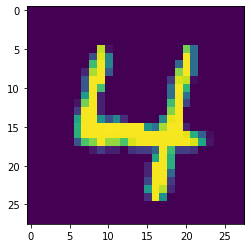

In [7]:
sample = X_train.loc[42]
plt.imshow(sample.values.reshape(W, H))

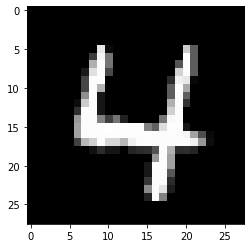

In [8]:
plt.imshow(sample.values.reshape(W, H), cmap=plt.cm.gray)

## Scale pixel values

divide pixel value by 255

In [9]:
X_train = X_train.astype('float32') / 255

In [10]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000860,0.000459,0.000231,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024755,0.018168,0.012839,0.006901,0.007429,0.001625,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


## Reshape train image for CNN input
Tensorflow (batch, width, height, channels)

In [11]:
X_train = X_train.values.reshape(-1, W, H, 1)
X_train.shape

(42000, 28, 28, 1)

## One hot encode label y
using keras.utils.np_utils.to_categorical()

In [12]:
number_of_classes = y_train.nunique()

y_train = np_utils.to_categorical(y_train, number_of_classes)

y_train.shape

(42000, 10)

In [13]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Define model

https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist

- input shape (width, height, channels)
- output layer's units (number_of_classes)

In [14]:
input_shape = (W, H, 1)

model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(number_of_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

## Early stopping and Save best model

EarlyStopping() will stop the training if there is no improvement on the monitored value (this example: val_loss)

ModelCheckpoint() will save the best val_loss model

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8, verbose=1, mode='min')
mcp_save = ModelCheckpoint('digit_recognizer.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [16]:
history = model.fit(X_train,
                    y_train, 
                    epochs=100, 
                    batch_size=32, 
                    verbose=1, 
                    validation_split=0.2,
                    callbacks=[early_stopping, mcp_save])

Epoch 1/100
1050/1050 [==============================] - 7s 4ms/step - loss: 0.5373 - accuracy: 0.8254 - val_loss: 0.0635 - val_accuracy: 0.9796

Epoch 00001: val_loss improved from inf to 0.06348, saving model to digit_recognizer.h5
Epoch 2/100
1050/1050 [==============================] - 4s 3ms/step - loss: 0.1104 - accuracy: 0.9670 - val_loss: 0.0519 - val_accuracy: 0.9842

Epoch 00002: val_loss improved from 0.06348 to 0.05190, saving model to digit_recognizer.h5
Epoch 3/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0821 - accuracy: 0.9755 - val_loss: 0.0497 - val_accuracy: 0.9843

Epoch 00003: val_loss improved from 0.05190 to 0.04966, saving model to digit_recognizer.h5
Epoch 4/100
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0670 - accuracy: 0.9789 - val_loss: 0.0410 - val_accuracy: 0.9865

Epoch 00004: val_loss improved from 0.04966 to 0.04102, saving model to digit_recognizer.h5
Epoch 5/100
1050/1050 [=============================

### Plot training graph
`model.fit()` function will return a dictionary of training datas including loss, val_loss, accuracy, and val_accuracy

the dictionary will look something like this
```js
{
    "val_loss": [ list of validation losses... ],
    "val_accuracy": [ list of validation accuracies... ],
    "loss": [ list of losses... ],
    "accuracy": [ list of accuracies... ]
}
```

In [17]:
# function to plot accuracy / loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [18]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

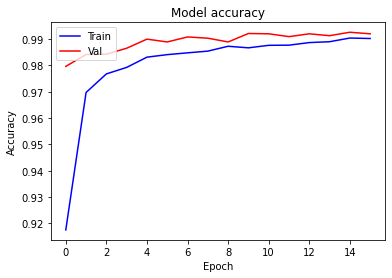

In [19]:
plotgraph(epochs, accuracy, val_accuracy)

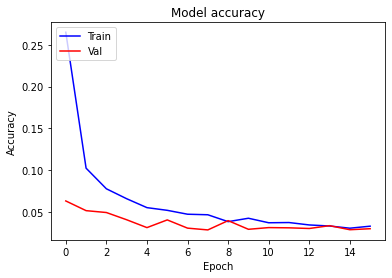

In [20]:
plotgraph(epochs, loss, val_loss)

## Load test dataset

In [21]:
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test_df.shape

(28000, 784)

## Repeat the same preprocessing as train_df to test_df
- Split labels & images
- Scale image pixel values
- Reshape flattened image pixel values to (bathc, width, height, channels)

In [23]:
X_test = test_df.values
print(X_test.shape)

# Scale pixel values
X_test = X_test.astype('float32') / 255

# Reshape to (batch, W, H, channels)
X_test = X_test.reshape(-1, W, H, 1)
print(X_test.shape)

(28000, 784)
(28000, 28, 28, 1)


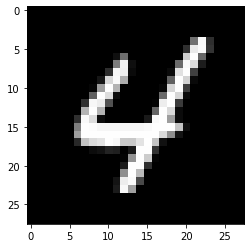

In [24]:
# plot image entry #42, reshape image to size 28x28 pixel
plt.imshow(X_test[42].reshape(28, 28), cmap=plt.cm.gray)

## Predict test image

each item of predictions `y_pred` is a list with length: 10 (output layer units/number_of_classes), the accuracy of each label predicted. 

(value of index 1 is  0.93, means label `1` has accuracy 93% which also means this image 93% might be `1`)

In [26]:
model = load_model('/kaggle/working/digit_recognizer.h5')

In [27]:
y_pred = model.predict(X_test)
y_pred.shape

(28000, 10)

## Visualize prediction

use `.argmax()` to get highest accuracy in prediction list (predicted label)

Plot image entry 10 to 16 and put the predicted label as title

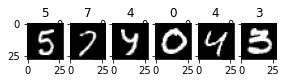

In [28]:
for i in range(10, 16):
    plt.subplot(280 + (i%10+1))
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(y_pred[i].argmax())
plt.show()

4


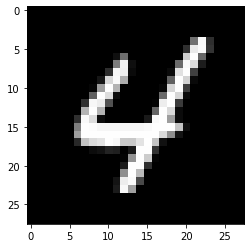

In [29]:
plt.imshow(X_test[42].reshape(W, H), cmap=plt.cm.gray)
print(y_pred[42].argmax())

## Build submission format

ImageId,Label

In [30]:
output = []
for index, prediction in tqdm(enumerate(y_pred), total=y_pred.shape[0]):
    image_id = index + 1
    label = prediction.argmax()
    output.append({"ImageId": image_id, "Label": label})

submission_df = pd.DataFrame(output)
submission_df.head()

100%|██████████| 28000/28000 [00:00<00:00, 441852.85it/s]


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [31]:
submission_df.to_csv('submission.csv', index=False)